## Первичный обзор данных

In [1]:
import pandas as pd

# Загрузка данных из файла Excel
file_path = './data/Impulse analisys2.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Первичный обзор данных
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41103 entries, 0 to 41102
Columns: 163 entries, id to avg_rate_ask_half_2
dtypes: datetime64[ns](3), float64(133), int64(22), object(5)
memory usage: 51.1+ MB
None
                  id      robot_id                      open_date  \
count   41103.000000  41103.000000                          41103   
mean   440369.465416     11.562295  2024-04-11 05:20:11.015740928   
min    399782.000000      3.000000            2024-03-31 20:42:48   
25%    419712.500000      6.000000            2024-04-06 15:41:08   
50%    446692.000000     11.000000            2024-04-09 05:49:48   
75%    460726.500000     17.000000            2024-04-16 19:23:16   
max    471018.000000     20.000000            2024-04-23 23:12:48   
std     22927.031077      6.109077                            NaN   

                          close_date         rate1         rate2  \
count                          41103  41103.000000  41103.000000   
mean   2024-04-11 07:05:56.5

## Предобработка данных

In [2]:
# Проверка на пропущенные значения
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Заполнение пропущенных значений
data.fillna(method='ffill', inplace=True)

# Преобразование данных
data['open_date'] = pd.to_datetime(data['open_date'])
data['close_date'] = pd.to_datetime(data['close_date'])

# Вывод первых нескольких строк данных для проверки
print(data.head())

Missing values in each column:
 id                        0
robot_id                  0
open_date                 0
close_date                0
platform1                 0
                         ..
w1m_9mos_avg_rate2        0
avg_rate_ask_quarter_1    0
avg_rate_ask_quarter_2    0
avg_rate_ask_half_1       0
avg_rate_ask_half_2       0
Length: 163, dtype: int64
       id  robot_id           open_date          close_date platform1  \
0  470976         5 2024-04-23 23:12:48 2024-04-23 23:20:38       OKX   
1  470978         5 2024-04-23 23:12:48 2024-04-23 23:20:38       OKX   
2  471012         5 2024-04-23 23:12:48 2024-04-23 23:42:25       OKX   
3  470975        20 2024-04-23 23:12:46 2024-04-23 23:20:35       OKX   
4  470977        20 2024-04-23 23:12:46 2024-04-23 23:20:38       OKX   

  platform2 currency_from currency_from2  rate1    rate2  ...  \
0   Binance           FIL           ALGO  6.347  0.19300  ...   
1     Bybit           FIL           ALGO  6.347  0.19300  ...   


## Анализ прибыли

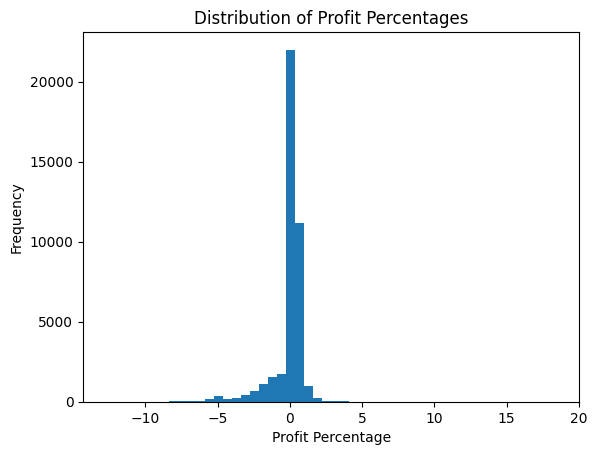

In [3]:
import matplotlib.pyplot as plt

# Гистограмма распределения прибыли
plt.hist(data['profit_percent'], bins=50)
plt.xlabel('Profit Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Profit Percentages')
plt.show()

## Анализ прибыли по платформам

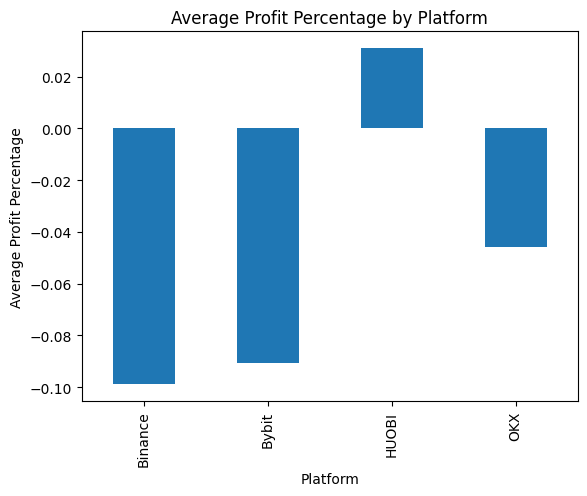

In [7]:
# Средняя прибыль по платформам
platform_profit_avg = data.groupby('platform1')['profit_percent'].mean()
platform_profit_avg.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Average Profit Percentage')
plt.title('Average Profit Percentage by Platform')
plt.show()

## Анализ прибыли по валютным парам

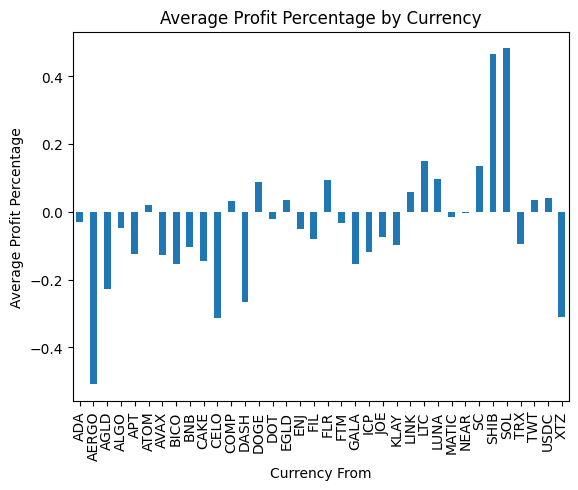

In [8]:
# Средняя прибыль по валютным парам
currency_profit_avg = data.groupby('currency_from')['profit_percent'].mean()
currency_profit_avg.plot(kind='bar')
plt.xlabel('Currency From')
plt.ylabel('Average Profit Percentage')
plt.title('Average Profit Percentage by Currency')
plt.show()

## Анализ комиссий

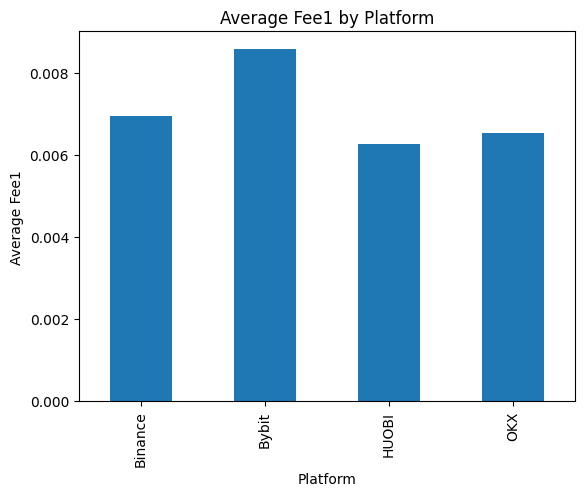

In [9]:
# Средняя комиссия по платформам
platform_fee1_avg = data.groupby('platform1')['fee1'].mean()
platform_fee1_avg.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Average Fee1')
plt.title('Average Fee1 by Platform')
plt.show()

## Анализ времени жизни ордеров

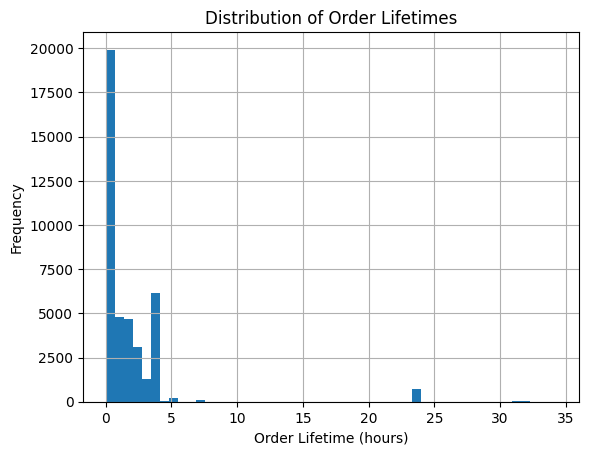

In [10]:
# Время жизни ордеров
data['order_lifetime'] = (data['close_date'] - data['open_date']).dt.total_seconds() / 3600
data['order_lifetime'].hist(bins=50)
plt.xlabel('Order Lifetime (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Lifetimes')
plt.show()

## Сравнение времени жизни ордеров по платформам

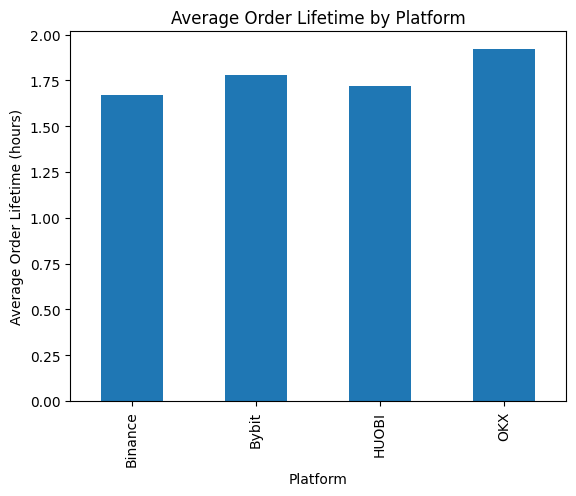

In [11]:
# Средняя продолжительность жизни ордеров по платформам
platform_lifetime_avg = data.groupby('platform1')['order_lifetime'].mean()
platform_lifetime_avg.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Average Order Lifetime (hours)')
plt.title('Average Order Lifetime by Platform')
plt.show()

## Матрица корреляций

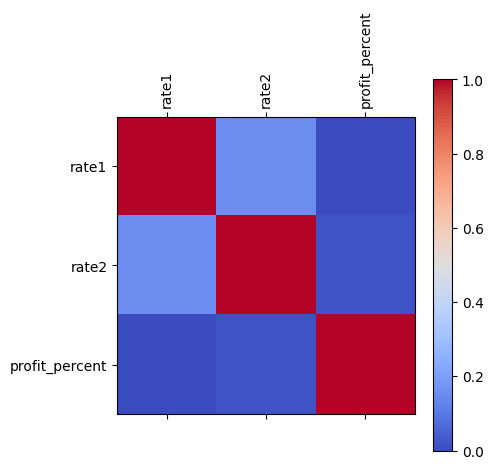

In [12]:
# Матрица корреляций
correlation_matrix = data[['rate1', 'rate2', 'profit_percent']].corr()
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

## Анализ коэффициентов корреляции для различных пар валют

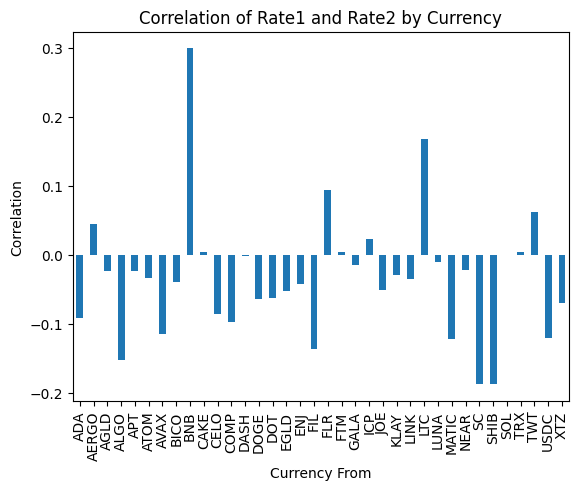

In [13]:
# Корреляция курсов rate1 и rate2 по валютным парам
currency_corr = data.groupby('currency_from')[['rate1', 'rate2']].corr().unstack().iloc[:,1]
currency_corr.plot(kind='bar')
plt.xlabel('Currency From')
plt.ylabel('Correlation')
plt.title('Correlation of Rate1 and Rate2 by Currency')
plt.show()

## Анализ стандартных отклонений для различных временных окон

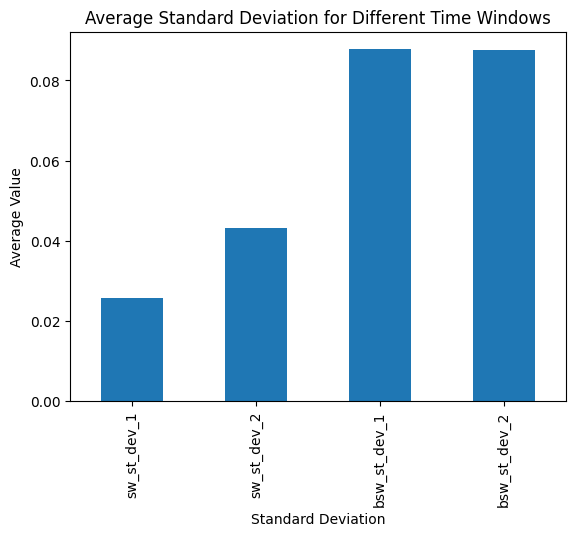

In [17]:
# Средние значения стандартных отклонений для различных временных окон
st_dev_avg = data[['sw_st_dev_1', 'sw_st_dev_2', 'bsw_st_dev_1', 'bsw_st_dev_2']].mean()
st_dev_avg.plot(kind='bar')
plt.xlabel('Standard Deviation')
plt.ylabel('Average Value')
plt.title('Average Standard Deviation for Different Time Windows')
plt.show()

## Тренды по времени для прибыли

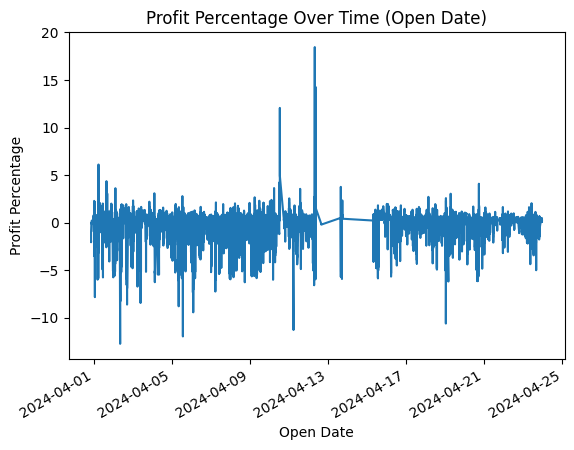

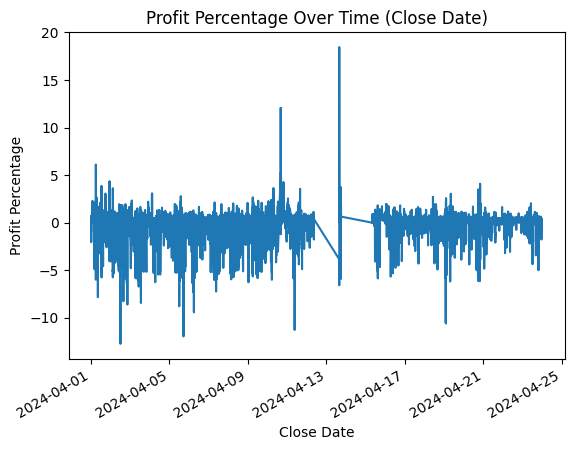

In [15]:
# Тренды прибыли по времени открытия сделок
data.set_index('open_date')['profit_percent'].plot()
plt.xlabel('Open Date')
plt.ylabel('Profit Percentage')
plt.title('Profit Percentage Over Time (Open Date)')
plt.show()

# Тренды прибыли по времени закрытия сделок
data.set_index('close_date')['profit_percent'].plot()
plt.xlabel('Close Date')
plt.ylabel('Profit Percentage')
plt.title('Profit Percentage Over Time (Close Date)')
plt.show()